In [233]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [234]:
# loading dataset
pdr_locations = pd.read_csv(r'C:\Users\Камила\Big_data\charging_stations\dataset\full\pdr_locations.csv')

In [235]:
# look at first 3 rows
pdr_locations.head(3)

,connector_id,connector_station_id,connector_evse_id,connector_connector_status_id,connector_status,connector_uid,station_id,station_uid,station_name,station_address,station_street_number,station_postal_code,station_city,station_country_id,station_country,station_coordinates_lat,station_coordinates_lon,station_directions,station_time_zone,station_type_name,station_station_type_id,station_brand,station_model,station_firmware,station_serial_number,station_bender_url,station_type_status,station_installation_date,station_commissioning_date,station_is_offline,station_is_at_home,station_is_qr_private_enable,station_owner_company_id,station_is_visible,station_payment_terminal_sn,station_mid_meter_sn,station_owner_company_uid,station_owner_company_name,station_owner_company_eMI3_id,station_owner_company_imported,station_owner_company_description_en,station_owner_company_description_it,station_owner_company_description_de,station_owner_company_description_fr,station_owner_company_street,station_owner_company_street_number,station_owner_company_zip,station_owner_company_city,station_owner_company_district,station_owner_company_state,station_owner_company_country,station_owner_company_vat,station_owner_company_email,station_owner_company_contact_email,station_owner_company_contact_name,station_owner_company_web,station_owner_company_phone,station_owner_company_fax,station_owner_company_company_types_id,station_owner_company_primary_category_id,station_owner_company_currency_id,station_owner_company_stripe_account_id,station_owner_company_stripe_customer_id,station_owner_company_stripe_public_key,station_owner_company_stripe_onboarding_status_id,station_owner_company_stripe_invoice_extra_fields,station_owner_company_stars,station_owner_company_is_always_open,station_owner_company_has_contract,station_owner_company_is_promotion,station_owner_company_has_colored_marker,station_owner_company_user_id,station_owner_company_parent_company_id,station_owner_company_corporate_admin_id,station_owner_company_logo,station_owner_company_promotion_date,station_owner_company_heycharge_api_key,station_owner_company_heycharge_email,station_owner_company_created_at,station_owner_company_updated_at,station_owner_company_endpoint,station_owner_company_is_jlr,station_owner_company_pin_color,station_owner_company_is_shopping_center,station_owner_company_role,station_owner_company_roaming,station_owner_company_id_offer,station_owner_company_deadline,station_owner_company_booking_url,station_owner_company_pay_description,station_owner_company_blacklist,station_owner_company_deleted_at,station_owner_company_contact_info,station_owner_company_show_emp_cost,station_owner_company_pois,station_owner_company_experiences,station_owner_company_itineraries,station_owner_company_sustainability_profile,station_owner_company_distances,station_owner_company_is_subcpo,station_owner_company_is_evfleet,station_owner_company_is_lifestyle,station_owner_company_is_dealer,station_owner_company_emp_services,station_owner_company_show_advanced_services,station_owner_company_show_roaming,station_owner_company_show_map,station_owner_company_brand_color,station_owner_company_app_customization_customers_id,station_owner_company_notification_type_id,station_owner_company_soc_notification_limit,station_owner_company_keyfob_fee,station_owner_company_saas_fee,station_owner_company_cpms_fee,station_owner_company_monthly_connector_fee,station_owner_company_monthly_sim_fee,station_owner_company_annual_platform_fee,station_owner_company_contract_start_date,station_owner_company_contract_end_date,station_owner_company_pre_authorization_amount,station_owner_company_reimbursement_kwh_cost_limit,station_owner_company_billing_cycle_anchor,station_owner_company_owner_cost_per_kwh,station_owner_company_alert_pro,station_owner_company_alert_based_on_station_tag,station_owner_company_delay_in_minutes,station_owner_company_alert_mail_to,station_owner_company_paid_private_sessions,plugs,sessions,totEnergy,

### Inspecting dataset

In [236]:
# number of rows, columns
pdr_locations.shape

(830, 144)

In [237]:
# look at the general statistics
pdr_locations.describe()

,connector_id,connector_station_id,connector_connector_status_id,station_id,station_street_number,station_postal_code,station_coordinates_lat,station_coordinates_lon,station_directions,station_time_zone,station_station_type_id,station_bender_url,station_owner_company_id,station_payment_terminal_sn,station_mid_meter_sn,station_owner_company_imported,station_owner_company_street_number,station_owner_company_zip,station_owner_company_vat,station_owner_company_email,station_owner_company_contact_email,station_owner_company_contact_name,station_owner_company_web,station_owner_company_phone,station_owner_company_fax,station_owner_company_company_types_id,station_owner_company_primary_category_id,station_owner_company_currency_id,station_owner_company_stripe_account_id,station_owner_company_stripe_customer_id,station_owner_company_stripe_public_key,station_owner_company_stripe_onboarding_status_id,station_owner_company_stripe_invoice_extra_fields,station_owner_company_stars,station_owner_company_has_colored_marker,station_owner_company_user_id,station_owner_company_parent_company_id,station_owner_company_corporate_admin_id,station_owner_company_promotion_date,station_owner_company_heycharge_api_key,station_owner_company_heycharge_email,station_owner_company_created_at,station_owner_company_endpoint,station_owner_company_is_jlr,station_owner_company_pin_color,station_owner_company_id_offer,station_owner_company_deadline,station_owner_company_booking_url,station_owner_company_pay_description,station_owner_company_deleted_at,station_owner_company_contact_info,station_owner_company_pois,station_owner_company_experiences,station_owner_company_itineraries,station_owner_company_sustainability_profile,station_owner_company_distances,station_owner_company_app_customization_customers_id,station_owner_company_notification_type_id,station_owner_company_soc_notification_limit,station_owner_company_keyfob_fee,station_owner_company_saas_fee,station_owner_company_cpms_fee,station_owner_company_monthly_connector_fee,station_owner_company_monthly_sim_fee,station_owner_company_annual_platform_fee,station_owner_company_contract_start_date,station_owner_company_contract_end_date,station_owner_company_pre_authorization_amount,station_owner_company_reimbursement_kwh_cost_limit,station_owner_company_billing_cycle_anchor,station_owner_company_owner_cost_per_kwh,station_owner_company_delay_in_minutes,totEnergy,totEnergyLocal,totEnergyNotLocal,totSessions,totSessionsNotLocal,totSessionsLocal,totCost,totHouseSessions,totPublicSessions,totPublicCost,totHouseCost,totHouseEnergy,totPublicEnergy
count,8.300000e+02,8.300000e+02,830.000000,8.300000e+02,0.0,830.000000,830.000000,830.000000,0.0,0.0,830.0,0.0,830.0,0.0,0.0,830.0,830.0,830.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,830.0,830.0,0.0,0.0,0.0,0.0,830.0,0.0,0.0,830.0,0.0,0.0,830.0,0.0,0.0,0.0,0.0,0.0,830.0,0.0,0.0,0.0,0.0,830.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,830.0,0.0,0.0,830.0,830.0,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.0,830.000000,830.000000,830.0,830.0,830.000000
mean,9.240990e+05,6.863694e+05,1.151807,6.863694e+05,NaN,36763.586747,43.772645,11.679412,NaN,NaN,4.0,NaN,31370.0,NaN,NaN,0.0,50.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,113.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,28260.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,0.0,25.0,14006.847572,0.000308,13711.930864,465.036145,454.827711,0.002410,9467.685855,0.0,465.036145,9467.685855,0.0,0.0,14006.847572
std,3.095176e+05,2.529324e+05,0.873737,2.529324e+05,NaN,24449.650843,1.605664,2.172102,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,15775.476469,0.006348,15449.816311,490.645257,480.294118,0.

### Handling missing values

In [238]:
# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)
missing_data

station_owner_company_parent_company_id                 830
station_owner_company_user_id                           830
station_owner_company_deadline                          830
station_owner_company_id_offer                          830
station_owner_company_pin_color                         830
station_owner_company_endpoint                          830
station_owner_company_created_at                        830
station_owner_company_heycharge_email                   830
station_owner_company_heycharge_api_key                 830
station_payment_terminal_sn                             830
station_mid_meter_sn                                    830
station_owner_company_promotion_date                    830
station_owner_company_stars                             830
station_owner_company_vat                               830
station_owner_company_stripe_invoice_extra_fields       830
station_owner_company_stripe_public_key                 830
station_owner_company_stripe_customer_id

In [239]:
# check duplications
pdr_locations.duplicated().sum()

0

we know that there are 830 rows overall in the dataset, and I will drop the columns that have all these rows empty.

In [240]:
# first, i want to count the number of these empty columns
num_empty_columns = len(pdr_locations.columns[pdr_locations.isnull().sum() == len(pdr_locations)])
num_empty_columns

50

In [241]:
# from above i know that there are 50 empty columns, i will drop them. 
columns_to_drop = pdr_locations.columns[pdr_locations.isnull().sum() == len(pdr_locations)]

In [242]:
pdr_locations = pdr_locations.drop(columns=columns_to_drop)
pdr_locations.shape

(830, 94)

In [243]:
# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)
missing_data

connector_isSuspended                                819
station_commissioning_date                           545
station_installation_date                            122
station_serial_number                                 79
station_firmware                                      79
station_model                                         79
station_brand                                         79
station_type_status                                    2
station_owner_company_owner_cost_per_kwh               0
station_owner_company_brand_color                      0
station_owner_company_show_map                         0
station_owner_company_show_roaming                     0
station_owner_company_show_advanced_services           0
station_owner_company_emp_services                     0
station_owner_company_is_dealer                        0
station_owner_company_is_lifestyle                     0
station_owner_company_is_evfleet                       0
station_owner_company_is_subcpo

as there are 830 rows, 50% of them will be 415. so i will drop columns that have more than 50% empty rows.

In [244]:
pdr_locations = pdr_locations.dropna(axis=1, thresh=len(pdr_locations) * 0.5)

In [245]:
pdr_locations.shape

(830, 92)

In [246]:
# displaying more rows of missing data
pd.set_option('display.max_rows', None)

# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)
missing_data

station_installation_date                            122
station_serial_number                                 79
station_firmware                                      79
station_model                                         79
station_brand                                         79
station_type_status                                    2
connector_id                                           0
station_owner_company_is_lifestyle                     0
station_owner_company_show_map                         0
station_owner_company_show_roaming                     0
station_owner_company_show_advanced_services           0
station_owner_company_emp_services                     0
station_owner_company_is_dealer                        0
station_owner_company_is_evfleet                       0
station_owner_company_pre_authorization_amount         0
station_owner_company_is_subcpo                        0
station_owner_company_show_emp_cost                    0
station_owner_company_blacklist

In [247]:
# i'm gonna focus only on missing valued columns
missing_columns = missing_data[missing_data > 0]
missing_columns

station_installation_date    122
station_serial_number         79
station_firmware              79
station_model                 79
station_brand                 79
station_type_status            2
dtype: int64

looking at the columns that have 70 missing rows, i want to check if they are consistent across these 4 columns:

In [248]:
# identifying 4 columns with 79 missing values
columns_with_79_missing = ['station_serial_number', 'station_firmware', 'station_model', 'station_brand']

# check if the missing values are consistent across these columns
missing_in_consistent_rows = pdr_locations[columns_with_79_missing].isnull().all(axis=1)

# filter rows where all 4 columns have missing values
consistent_missing_rows = pdr_locations[missing_in_consistent_rows]
consistent_missing_rows


,connector_id,connector_station_id,connector_evse_id,connector_connector_status_id,connector_status,connector_uid,station_id,station_uid,station_name,station_address,station_postal_code,station_city,station_country_id,station_country,station_coordinates_lat,station_coordinates_lon,station_type_name,station_station_type_id,station_brand,station_model,station_firmware,station_serial_number,station_type_status,station_installation_date,station_is_offline,station_is_at_home,station_is_qr_private_enable,station_owner_company_id,station_is_visible,station_owner_company_uid,station_owner_company_name,station_owner_company_eMI3_id,station_owner_company_imported,station_owner_company_description_en,station_owner_company_description_it,station_owner_company_description_de,station_owner_company_description_fr,station_owner_company_street,station_owner_company_street_number,station_owner_company_zip,station_owner_company_city,station_owner_company_district,station_owner_company_state,station_owner_company_country,station_owner_company_company_types_id,station_owner_company_primary_category_id,station_owner_company_stripe_onboarding_status_id,station_owner_company_is_always_open,station_owner_company_has_contract,station_owner_company_is_promotion,station_owner_company_has_colored_marker,station_owner_company_corporate_admin_id,station_owner_company_logo,station_owner_company_updated_at,station_owner_company_is_jlr,station_owner_company_is_shopping_center,station_owner_company_role,station_owner_company_roaming,station_owner_company_pay_description,station_owner_company_blacklist,station_owner_company_show_emp_cost,station_owner_company_is_subcpo,station_owner_company_is_evfleet,station_owner_company_is_lifestyle,station_owner_company_is_dealer,station_owner_company_emp_services,station_owner_company_show_advanced_services,station_owner_company_show_roaming,station_owner_company_show_map,station_owner_company_brand_color,station_owner_company_pre_authorization_amount,station_owner_company_owner_cost_per_kwh,station_owner_company_alert_pro,station_owner_company_alert_based_on_station_tag,station_owner_company_delay_in_minutes,station_owner_company_alert_mail_to,station_owner_company_paid_private_sessions,plugs,sessions,totEnergy,totEnergyLocal,totEnergyNotLocal,totSessions,totSessionsNotLocal,totSessionsLocal,totCost,totHouseSessions,totPublicSessions,totPublicCost,totHouseCost,totHouseEnergy,totPublicEnergy
227,1354231,1014238,IT*F2X*EF2XITN0503*1,1,AVAILABLE,1a7287c9-0f0b-4654-960e-6ec56fb8b643,1014238,04882182-c137-4a85-a111-e4483778830a,Area di Servizio - Pioppa Est,A14 - Autostrada Adriatica,40069,Bologna,IT,Italy,44.519363,11.214104,PARKING_LOT,4,NaN,NaN,NaN,NaN,public,2024-06-26T00:00:00.000000Z,False,False,False,31370,True,27598fda-fcc1-4f20-9a24-c1af964d57ee,Free to X,IT*ASP,0,"Revolutionize your travel experience. Free to X is committed to building the largest high-speed charging network for electric vehicles in the motorway sector in Italy. The goal is to accompany you from departure to arrival with innovative services and constantly updated information to improve the travel experience at 360 °, focusing on innovation, technology and sustainability, both on and off the motorway network.","Rivoluziona l’esperienza del tuo viaggio. Free to X si impegna a realizzare in Italia la più grande rete di ricarica ad alta velocità per veicoli elettrici in ambito autostradale. L’obiettivo è quello di accompagnarti dalla partenza all’arrivo con servizi innovativi e informazioni sempre aggiornate per migliorare l’esperienza di viaggio a 360°, puntando su innovazione, tecnologia e sostenibilità, dentro e fuori dalla rete autostradale.","Revolutionieren Sie Ihr Reiseerlebnis. Free to X hat sich zum Ziel gesetzt, das größte Hochgeschwindigkeits-Ladesystem für Elektrofahrzeuge im Autobahnsektor in Italien aufzubauen. Ziel ist es, Sie von der Abfahrt bis zur Ankunft mit innovativen Dienstleistungen und ständig aktualisierten Informationen zu beglei

above i show exactly those 79 rows, but here i'm making sure if it's true.

In [249]:
# identifying the 4 columns with 79 missing values
columns_with_79_missing = ['station_serial_number', 'station_firmware', 'station_model', 'station_brand']

# check if the missing values are consistent across these columns
consistent_missing = pdr_locations[columns_with_79_missing].isnull().all(axis=1).sum() == 79
consistent_missing

True

so, the result is yes, but still i want to see if they directly affect on customer behaviour, that is why i will see their unique values, and if they have too many, i would like to drop them, as it will be hard to analyze.

In [250]:
# check the number of unique values in each column
for column in ['station_brand', 'station_model', 'station_firmware', 'station_serial_number']:
    unique_values = pdr_locations[column].nunique()
    print(f"{column}: {unique_values} unique values")


station_brand: 4 unique values
station_model: 11 unique values
station_firmware: 14 unique values
station_serial_number: 333 unique values


+ thinking logically, it is obvious that *station_brand* could be **important** for the customer, especially if customers prefer certain brands.
+ *station_model* could be important if specific station models offer better features, but it's **less likely** to directly influence customer behavior unless advertised as such;
+ *station_firmware* usually pertains to the software version of the station, which is **unlikely** to directly impact customer decisions, unless customers are aware that firmware impacts performance.
+ *station_serial_number* is the serial number for charging station hardware and **would not directly** affect customer behavior.

That's why I can leave station_brand, and drop other 3 as they either don't significantly influence customer behavior or have too many unique values to be meaningful.

In [251]:
# dropping the columns that i don't need
columns_to_drop = ['station_model', 'station_firmware', 'station_serial_number']

# drop these columns from the dataset
pdr_locations = pdr_locations.drop(columns=columns_to_drop)
pdr_locations.head()


,connector_id,connector_station_id,connector_evse_id,connector_connector_status_id,connector_status,connector_uid,station_id,station_uid,station_name,station_address,station_postal_code,station_city,station_country_id,station_country,station_coordinates_lat,station_coordinates_lon,station_type_name,station_station_type_id,station_brand,station_type_status,station_installation_date,station_is_offline,station_is_at_home,station_is_qr_private_enable,station_owner_company_id,station_is_visible,station_owner_company_uid,station_owner_company_name,station_owner_company_eMI3_id,station_owner_company_imported,station_owner_company_description_en,station_owner_company_description_it,station_owner_company_description_de,station_owner_company_description_fr,station_owner_company_street,station_owner_company_street_number,station_owner_company_zip,station_owner_company_city,station_owner_company_district,station_owner_company_state,station_owner_company_country,station_owner_company_company_types_id,station_owner_company_primary_category_id,station_owner_company_stripe_onboarding_status_id,station_owner_company_is_always_open,station_owner_company_has_contract,station_owner_company_is_promotion,station_owner_company_has_colored_marker,station_owner_company_corporate_admin_id,station_owner_company_logo,station_owner_company_updated_at,station_owner_company_is_jlr,station_owner_company_is_shopping_center,station_owner_company_role,station_owner_company_roaming,station_owner_company_pay_description,station_owner_company_blacklist,station_owner_company_show_emp_cost,station_owner_company_is_subcpo,station_owner_company_is_evfleet,station_owner_company_is_lifestyle,station_owner_company_is_dealer,station_owner_company_emp_services,station_owner_company_show_advanced_services,station_owner_company_show_roaming,station_owner_company_show_map,station_owner_company_brand_color,station_owner_company_pre_authorization_amount,station_owner_company_owner_cost_per_kwh,station_owner_company_alert_pro,station_owner_company_alert_based_on_station_tag,station_owner_company_delay_in_minutes,station_owner_company_alert_mail_to,station_owner_company_paid_private_sessions,plugs,sessions,totEnergy,totEnergyLocal,totEnergyNotLocal,totSessions,totSessionsNotLocal,totSessionsLocal,totCost,totHouseSessions,totPublicSessions,totPublicCost,totHouseCost,totHouseEnergy,totPublicEnergy
0,462849,385079,IT*F2X*EF2XITA2151*1,1,AVAILABLE,6ea4dcd0-6678-4585-8b8d-41ea3a1cee39,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,IT,Italy,44.962660,9.904260,PARKING_LOT,4,EVTEC,public,2022-04-22T00:00:00.000000Z,False,False,False,31370,True,27598fda-fcc1-4f20-9a24-c1af964d57ee,Free to X,IT*ASP,0,"Revolutionize your travel experience. Free to X is committed to building the largest high-speed charging network for electric vehicles in the motorway sector in Italy. The goal is to accompany you from departure to arrival with innovative services and constantly updated information to improve the travel experience at 360 °, focusing on innovation, technology and sustainability, both on and off the motorway network.","Rivoluziona l’esperienza del tuo viaggio. Free to X si impegna a realizzare in Italia la più grande rete di ricarica ad alta velocità per veicoli elettrici in ambito autostradale. L’obiettivo è quello di accompagnarti dalla partenza all’arrivo con servizi innovativi e informazioni sempre aggiornate per migliorare l’esperienza di viaggio a 360°, puntando su innovazione, tecnologia e sostenibilità, dentro e fuori dalla rete autostradale.","Revolutionieren Sie Ihr Reiseerlebnis. Free to X hat sich zum Ziel gesetzt, das größte Hochgeschwindigkeits-Ladesystem für Elektrofahrzeuge im Autobahnsektor in Italien aufzubauen. Ziel ist es, Sie von der Abfahrt bis zur Ankunft mit innovativen Dienstleistungen und ständig aktualisierten Informationen zu begleiten, um das Reiseerlebnis bei 360 ° zu verbessern, wobei der

In [252]:
# displaying more rows of missing data
pd.set_option('display.max_rows', None)

# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)

# i'm gonna focus only on missing valued columns
missing_columns = missing_data[missing_data > 0]
missing_columns

station_installation_date    122
station_brand                 79
station_type_status            2
dtype: int64

now i want to see what kind of unique values does station_brand have:

In [253]:
# display the unique values of the 'station_brand' column
unique_brands = pdr_locations['station_brand'].unique()
unique_brands

array(['EVTEC', 'alpitronic GmbH', nan, 'FIMER SPA', 'Wall Box Chargers'],
      dtype=object)

In [254]:
# replace nan values in 'station_brand' with 'Unknown'
pdr_locations['station_brand'].fillna('Unknown', inplace=True)

# verify the replacement by checking the unique values again
unique_brands_after_replacement = pdr_locations['station_brand'].unique()
print(unique_brands_after_replacement)


['EVTEC' 'alpitronic GmbH' 'Unknown' 'FIMER SPA' 'Wall Box Chargers']


In [255]:
# display the unique values of the 'station_type_status' column
unique_brands = pdr_locations['station_type_status'].unique()
unique_brands

array(['public', 'to_be_installed', nan], dtype=object)

there are 2 rows that have empty station status, and i cannot fill them with either 'public' or 'to be installed', that's why i decided to drop them, it will not significantly affect the results.

In [256]:
# Drop rows where 'station_type_status' is NaN
pdr_locations.dropna(subset=['station_type_status'], inplace=True)


however, about station_installation_date I am not sure, there are 122 missing values, maybe we will need this information further, so I have 2 options: 
1) to leave it empty 
2) to fill it with '0000-00-00T00:00:00.000000Z'

I chose to leave it empty for now.

In [257]:
# replace NaN values in 'station_installation_date' with the placeholder date
# pdr_locations['station_installation_date'].fillna('0000-00-00T00:00:00.000000Z', inplace=True)

# verify the replacement by checking unique values in 'station_installation_date'
# unique_installation_dates = pdr_locations['station_installation_date'].unique()

In [258]:
# displaying more rows of missing data
pd.set_option('display.max_rows', None)

# check for columns with missing values
missing_data = pdr_locations.isnull().sum().sort_values(ascending=False)

# i'm gonna focus only on missing valued columns
missing_columns = missing_data[missing_data > 0]
missing_columns

station_installation_date    120
dtype: int64

In [259]:
pdr_locations.shape

(828, 89)

now, i want to see other columns' unique values, because if there is only one unique value, i don't think it's a good idea to leave this column in dataset. especially, if it's connected like with Italy, because we all work on the dataset of one country, and we want our dataset to have more meaningful data.

In [260]:
# calculate the number of unique values in each column
unique_values_count = pdr_locations.nunique()

# convert to a DataFrame for better visualization
unique_values_df = pd.DataFrame(unique_values_count, columns=['Number of Unique Values'])
unique_values_df


,Number of Unique Values
connector_id,828
connector_station_id,370
connector_evse_id,828
connector_connector_status_id,4
connector_status,4
connector_uid,828
station_id,370
station_uid,370
station_name,112
station_address,38


we see there are a lot of columns that have only one unique value, now i will show what are they:

In [261]:
# filter columns that have only 1 unique value
single_value_columns = pdr_locations.nunique()[pdr_locations.nunique() == 1].index

# create a dataFrame to show the column name, number of unique values, and the value itself
single_value_df = pd.DataFrame({
    'Column Name': single_value_columns,
    'Number of Unique Values': [1] * len(single_value_columns),
    'Value': [pdr_locations[col].unique()[0] for col in single_value_columns]
}).reset_index(drop=True)

print(single_value_df.to_string(index=False))

                                      Column Name  Number of Unique Values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Value
                               station_country_id                        1                                                                                                                                                                                                                                                                                                                                                                          

I'm gonna justify why drop all the columns:
+ station_country_id = IT, which is the abbreviation for Italy, our project is about Italian stations, so anyways it is obvious for everyone it's Italian, there are no more other countries.

same reason as above:
+ station_country = Italy
+ station_type_name = PARKING_LOT
+ station_station_type_id = 4, as we have only one station type, it also doesn't make sense.
+ station_is_offline, station_is_at_home, station_is_qr_private_enable = False
+ station_owner_company_id, station_owner_company_uid, station_owner_company_name, station_owner_company_eMI3_id, station_owner_company_imported = everything about Free To X company
+ station_owner_company_description_en, station_owner_company_description_it, station_owner_company_description_de, tation_owner_company_description_fr = translations about company description, we don't need this info.
+ station_owner_company_street, station_owner_company_street_number, station_owner_company_zip, station_owner_company_city, station_owner_company_district, station_owner_company_state, station_owner_company_country = all about the street info of company
+ station_owner_company_country, station_owner_company_primary_category_id = type of company and its services.
+ all others you can see above.

In [262]:
# Drop the columns that have only one unique value from the CSV DataFrame
pdr_locations = pdr_locations.drop(columns=single_value_columns)

# Display the remaining columns in the cleaned DataFrame
pdr_locations.columns

Index(['connector_id', 'connector_station_id', 'connector_evse_id',
       'connector_connector_status_id', 'connector_status', 'connector_uid',
       'station_id', 'station_uid', 'station_name', 'station_address',
       'station_postal_code', 'station_city', 'station_coordinates_lat',
       'station_coordinates_lon', 'station_brand', 'station_type_status',
       'station_installation_date', 'station_is_visible', 'plugs', 'sessions',
       'totEnergy', 'totEnergyLocal', 'totEnergyNotLocal', 'totSessions',
       'totSessionsNotLocal', 'totSessionsLocal', 'totCost',
       'totPublicSessions', 'totPublicCost', 'totPublicEnergy'],
      dtype='object')

In [263]:
pdr_locations.shape

(828, 30)

In [264]:
pdr_locations.head(3)

,connector_id,connector_station_id,connector_evse_id,connector_connector_status_id,connector_status,connector_uid,station_id,station_uid,station_name,station_address,station_postal_code,station_city,station_coordinates_lat,station_coordinates_lon,station_brand,station_type_status,station_installation_date,station_is_visible,plugs,sessions,totEnergy,totEnergyLocal,totEnergyNotLocal,totSessions,totSessionsNotLocal,totSessionsLocal,totCost,totPublicSessions,totPublicCost,totPublicEnergy
0,462849,385079,IT*F2X*EF2XITA2151*1,1,AVAILABLE,6ea4dcd0-6678-4585-8b8d-41ea3a1cee39,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,True,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]","[{'count': 19, 'energy': 323.54699999999997, 'date': '2024-01', 'cost': '177.93', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 14, 'energy': 325.219, 'date': '2024-02', 'cost': '178.87', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 14, 'energy': 287.817, 'date': '2024-03', 'cost': '158.31', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 25, 'energy': 543.858, 'date': '2024-04', 'cost': '299.07', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 27, 'energy': 497.32099999999997, 'date': '2024-05', 'cost': '273.53', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 32, 'energy': 593.2139999999999, 'date': '2024-06', 'cost': '327.29', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 36, 'energy': 854.2650000000002, 'date': '2024-07', 'cost': '474.35', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 32, 'energy': 710.9700000000001, 'date': '2024-08', 'cost': '391.04', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 2, 'energy': 58.870000000000005, 'date': '2024-09', 'cost': '32.38', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}]",4195.081,0.0,4064.325,201,198,0,2312.77,201,2312.77,4195.081
1,462850,385079,IT*F2X*EF2XITA2151*2,1,AVAILABLE,826d0eaa-0de0-4aa4-b65e-5db33380c57a,385079,fe01af77-ad39-4ad9-80bf-322d7c02a4a9,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,True,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 1, 'plug_format_id': 2, 'type': 'CHADEMO', 'format': 'CABLE'}]","[{'count': 14, 'energy': 190.02499999999998, 'date': '2024-01', 'cost': '104.50', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 7, 'energy': 122.517, 'date': '2024-02', 'cost': '67.38', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 10, 'energy': 196.48600000000002, 'date': '2024-03', 'cost': '108.07', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 6, 'energy': 72.606, 'date': '2024-04', 'cost': '39.94', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 13, 'energy': 223.766, 'date': '2024-05', 'cost': '123.08', 'cou

i'll check for the consistency of these columns:
1) connector_id and connector_uid
2) connector_station_id and station_id and station_uid

In [265]:
# Group by 'connector_uid' and check the number of unique 'connector_id' values
connector_id_uid_consistency = pdr_locations.groupby('connector_uid')['connector_id'].nunique().reset_index()

# Find cases where a 'connector_uid' is associated with more than one 'connector_id'
inconsistent_connector_ids = connector_id_uid_consistency[connector_id_uid_consistency['connector_id'] > 1]

# Display inconsistent rows
if inconsistent_connector_ids.empty:
    print("No inconsistencies between 'connector_id' and 'connector_uid'.")
else:
    print("Inconsistencies found between 'connector_id' and 'connector_uid':")
    print(inconsistent_connector_ids)

No inconsistencies between 'connector_id' and 'connector_uid'.


so i can drop connector_uid.

In [266]:
# Group by 'station_uid' and check the number of unique 'connector_station_id' and 'station_id' values
station_id_uid_consistency = pdr_locations.groupby('station_uid').agg(
    unique_connector_station_id=('connector_station_id', 'nunique'),
    unique_station_id=('station_id', 'nunique')
).reset_index()

# Find cases where 'station_uid' has multiple 'connector_station_id' or 'station_id' values
inconsistent_station_ids = station_id_uid_consistency[
    (station_id_uid_consistency['unique_connector_station_id'] > 1) | 
    (station_id_uid_consistency['unique_station_id'] > 1)
]

# Display inconsistent rows (if any)
if inconsistent_station_ids.empty:
    print("No inconsistencies between 'connector_station_id', 'station_id', and 'station_uid'.")
else:
    print("Inconsistencies found between 'connector_station_id', 'station_id', and 'station_uid':")
    print(inconsistent_station_ids)

No inconsistencies between 'connector_station_id', 'station_id', and 'station_uid'.


so i can drop 'station_id', and 'station_uid'.

i'll check for the equality of these columns:
1) totEnergy and totPublicEnergy
2) totSessions and totPublicSessions
3) totCost and totPublicCost

In [267]:
# 1. Checking if totEnergy and totPublicEnergy are equal

# Ensure totEnergy is equal to totPublicEnergy
inconsistency = pdr_locations[pdr_locations['totEnergy'] != pdr_locations['totPublicEnergy']]

if inconsistency.empty:
    print("All values in 'totEnergy' are equal to 'totPublicEnergy'.")
else:
    print("Inconsistencies found where 'totPublicEnergy' is not equal to 'totEnergy':")
    print(inconsistency[['totEnergy', 'totPublicEnergy']])

All values in 'totEnergy' are equal to 'totPublicEnergy'.


that's why we don't need totPublicEnergy.

In [268]:
# 2. Checking if totSessions and totPublicSessions are equal

# Ensure totSessions is equal to totPublicSessions
inconsistency = pdr_locations[pdr_locations['totSessions'] != pdr_locations['totPublicSessions']]

if inconsistency.empty:
    print("All values in 'totSessions' are equal to 'totPublicSessions'.")
else:
    print("Inconsistencies found where 'totPublicSessions' is not equal to 'totSessions':")
    print(inconsistency[['totSessions', 'totPublicSessions']])

All values in 'totSessions' are equal to 'totPublicSessions'.


that's why we don't need totPublicSessions.

In [269]:
# 3. Checking if totCost and totPublicCost are equal

# Ensure totCost is equal to totPublicCost
inconsistency = pdr_locations[pdr_locations['totCost'] != pdr_locations['totPublicCost']]

if inconsistency.empty:
    print("All values in 'totCost' are equal to 'totPublicCost'.")
else:
    print("Inconsistencies found where 'totPublicCost' is not equal to 'totCost':")
    print(inconsistency[['totCost', 'totPublicCost']])

All values in 'totCost' are equal to 'totPublicCost'.


that's why we don't need totPublicCost.

so I will delete them from the dataset later with others.

Columns that are unlikely to affect customer behavior:
+ connector_station_id, station_id, station_uid: These are identifiers for internal tracking and are not visible to customers.
+ connector_connector_status_id, station_is_visible: These are more internal flags and statuses that do not directly impact customer behavior.
+ totEnergyLocal, totEnergyNotLocal, totSessionsNotLocal, totSessionsLocal: These are aggregate metrics for operational analysis and are not directly relevant to individual customer experiences.

So, I will **KEEP** columns: related to location, brand, availability, service type, and usage metrics and **DROP** columns that are identifiers, internal flags, or operational metrics that are not customer-facing.

In [270]:
# defining columns to drop based on the analysis
columns_to_drop = [
    'connector_connector_status_id', 'station_is_visible', 
    'totEnergyLocal', 'totEnergyNotLocal', 
    'totSessionsNotLocal', 'totSessionsLocal',  
    'totPublicCost', 'totPublicSessions', 'totPublicEnergy', # 3 columns that are equal to other columns that i left
    'connector_uid', 'station_id', 'station_uid' # the same as connector_id, and other are 2 columns that have the same values as connector_station_id
]

# drop the columns
pdr_locations_cleaned  = pdr_locations.drop(columns=columns_to_drop)
pdr_locations_cleaned .columns

Index(['connector_id', 'connector_station_id', 'connector_evse_id',
       'connector_status', 'station_name', 'station_address',
       'station_postal_code', 'station_city', 'station_coordinates_lat',
       'station_coordinates_lon', 'station_brand', 'station_type_status',
       'station_installation_date', 'plugs', 'sessions', 'totEnergy',
       'totSessions', 'totCost'],
      dtype='object')

In [271]:
pdr_locations_cleaned.shape

(828, 18)

In [272]:
pdr_locations_cleaned.describe()

,connector_id,connector_station_id,station_postal_code,station_coordinates_lat,station_coordinates_lon,totEnergy,totSessions,totCost
count,8.280000e+02,8.280000e+02,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,9.229180e+05,6.855304e+05,36840.274155,43.774811,11.678591,14036.126950,466.041063,9487.456594
std,3.089553e+05,2.526600e+05,24429.235550,1.606998,2.174663,15783.256892,490.810903,10808.229534
min,4.187280e+05,3.691160e+05,10.000000,40.837613,8.440903,0.000000,0.000000,0.000000
25%,6.250478e+05,4.446588e+05,20026.000000,42.200441,9.393757,1127.410500,79.750000,581.065000
50%,9.743665e+05,5.807360e+05,36510.000000,44.392512,11.570786,7887.934500,284.500000,5364.515000
75%,1.167043e+06,9.524122e+05,52041.000000,45.091749,13.334975,23308.863000,731.500000,15855.485000
max,1.413002e+06,1.033692e+06,83100.000000,46.499013,16.769807,95445.220000,3062.000000,64974.670000


In [273]:
# displaying the column names, their data types, and the number of unique values
column_info_df = pd.DataFrame({
    'Column Name': pdr_locations_cleaned.columns,
    'Data Type': pdr_locations_cleaned.dtypes.values,
    'Number of Unique Values': pdr_locations_cleaned.nunique().values
})

print(column_info_df)

                  Column Name Data Type  Number of Unique Values
0                connector_id     int64                      828
1        connector_station_id     int64                      370
2           connector_evse_id    object                      828
3            connector_status    object                        4
4                station_name    object                      112
5             station_address    object                       38
6         station_postal_code     int64                       68
7                station_city    object                       67
8     station_coordinates_lat   float64                      347
9     station_coordinates_lon   float64                      350
10              station_brand    object                        5
11        station_type_status    object                        2
12  station_installation_date    object                      119
13                      plugs    object                       11
14                   sess

rechecking some columns i'm not sure on that they have categorical values, they have array - dictionary like format:

In [274]:
# Display the first 5 rows of the 'sessions' column, showing all the content
pd.set_option('display.max_colwidth', None)  # all content in the column is fully displayed
pdr_locations_cleaned['sessions'].head()

0                                        [{'count': 19, 'energy': 323.54699999999997, 'date': '2024-01', 'cost': '177.93', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 14, 'energy': 325.219, 'date': '2024-02', 'cost': '178.87', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 14, 'energy': 287.817, 'date': '2024-03', 'cost': '158.31', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 25, 'energy': 543.858, 'date': '2024-04', 'cost': '299.07', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 0}, {'count': 27, 'energy': 497.32099999999997, 'date': '2024-05', 'cost': '273.53', 'countInHouse': 0, 'countInPublic': 0, 'energyInHouse': 0, 'energyInPublic': 0, 'costInHouse': 0, 'costInPublic': 

In [275]:
pdr_locations_cleaned['plugs'].unique()

array(["[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 1, 'plug_format_id': 2, 'type': 'CHADEMO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 22000, 'max_voltage': 230, 'power_type_id': 2, 'plug_type_id': 20, 'plug_format_id': 1, 'type': 'TYPE 2', 'format': 'SOCKET'}]",
       "[{'max_electric_power': 300000, 'max_voltage': 600, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 50000, 'max_voltage': 1000, 'power_type_id': 3, 'plug_type_id': 1, 'plug_format_id': 2, 'type': 'CHADEMO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 400000, 'max_voltage': 800, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",
       "[{'max_electric_power': 150000,

I'm not sure what can i do with these 2 columns, so I have 2 options:
1) i will just label encode them;
2) I will modify keys to columns and values to rows.

I will do the 2nd option below after some visualizations.

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

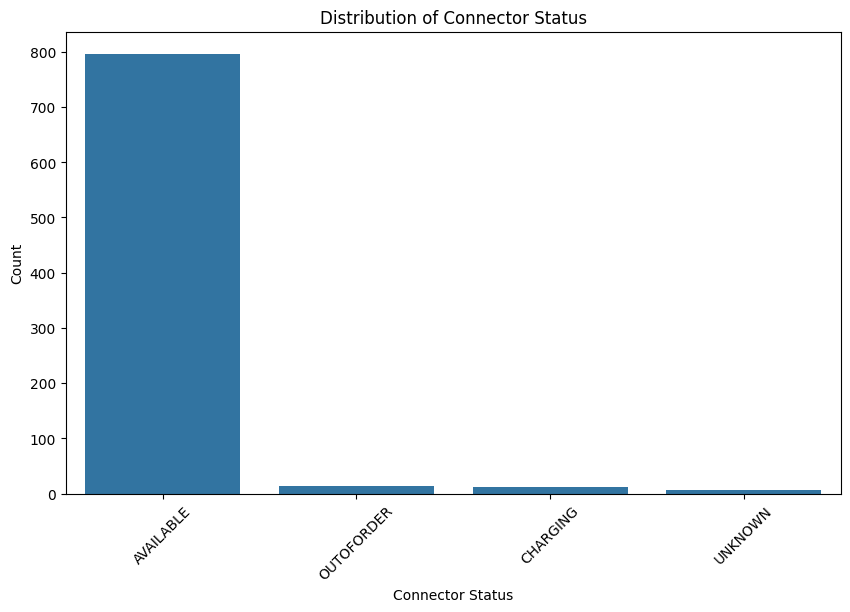

In [277]:
# plot the distribution of connector status
plt.figure(figsize=(10, 6))
sns.countplot(x='connector_status', data=pdr_locations_cleaned)
plt.title('Distribution of Connector Status')
plt.xlabel('Connector Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

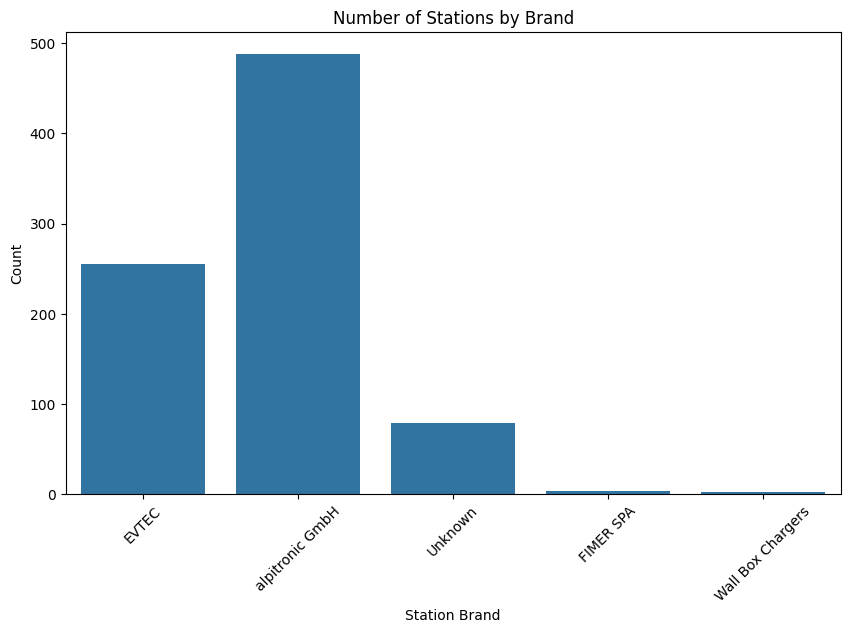

In [278]:
# bar plot of the number of stations by brand
plt.figure(figsize=(10, 6))
sns.countplot(x='station_brand', data=pdr_locations_cleaned)
plt.title('Number of Stations by Brand')
plt.xlabel('Station Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


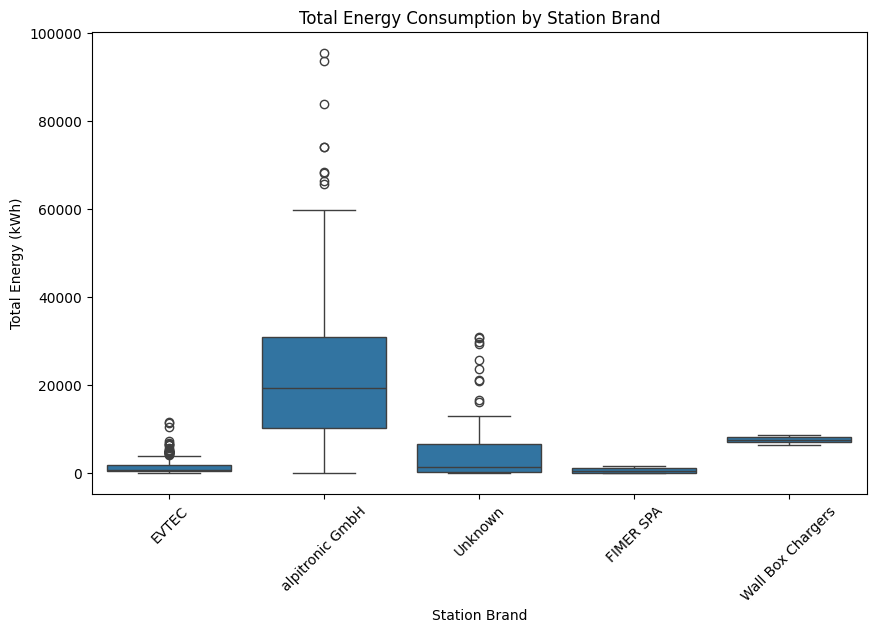

In [279]:
# Box plot of total energy consumption by station brand
plt.figure(figsize=(10, 6))
sns.boxplot(x='station_brand', y='totEnergy', data=pdr_locations_cleaned)
plt.title('Total Energy Consumption by Station Brand')
plt.xlabel('Station Brand')
plt.ylabel('Total Energy (kWh)')
plt.xticks(rotation=45)
plt.show()

### Expanding Dictionaries 

In [280]:
# Check the type of the first entry in the 'sessions' column
type(pdr_locations_cleaned['sessions'].iloc[0])

str

expanding everything but also filling other empty rows according their values.

In [281]:
import ast

# Convert the 'sessions' column into actual lists of dictionaries
pdr_locations_cleaned['sessions'] = pdr_locations_cleaned['sessions'].apply(ast.literal_eval)

# Explode the list of dictionaries into separate rows while keeping other columns intact
sessions_exploded = pdr_locations_cleaned.explode('sessions').reset_index(drop=True)

# Flatten the dictionaries in the 'sessions' column into separate columns
sessions_expanded = pd.json_normalize(sessions_exploded['sessions'])

# Drop the original 'sessions' column and concatenate the flattened session data
pdr_locations_cleaned = pd.concat([sessions_exploded.drop(columns=['sessions']), sessions_expanded], axis=1)

# Display the first few rows to verify the result
pdr_locations_cleaned.head()

,connector_id,connector_station_id,connector_evse_id,connector_status,station_name,station_address,station_postal_code,station_city,station_coordinates_lat,station_coordinates_lon,station_brand,station_type_status,station_installation_date,plugs,totEnergy,totSessions,totCost,count,energy,date,cost,countInHouse,countInPublic,energyInHouse,energyInPublic,costInHouse,costInPublic
0,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",4195.081,201,2312.77,19.0,323.547,2024-01,177.93,0.0,0.0,0.0,0.0,0.0,0.0
1,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",4195.081,201,2312.77,14.0,325.219,2024-02,178.87,0.0,0.0,0.0,0.0,0.0,0.0
2,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",4195.081,201,2312.77,14.0,287.817,2024-03,158.31,0.0,0.0,0.0,0.0,0.0,0.0
3,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",4195.081,201,2312.77,25.0,543.858,2024-04,299.07,0.0,0.0,0.0,0.0,0.0,0.0
4,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",4195.081,201,2312.77,27.0,497.321,2024-05,273.53,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
pdr_locations_cleaned.shape

(6235, 27)

In [283]:
# Checking for missing values in the new expanded DataFrame
missing_values = pdr_locations_cleaned.isnull().sum()

# Filtering to only show columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Display columns with missing values
print(missing_columns)

station_installation_date    913
count                          7
energy                         7
date                           7
cost                          11
countInHouse                   7
countInPublic                  7
energyInHouse                  7
energyInPublic                 7
costInHouse                    7
costInPublic                   7
dtype: int64


In [284]:
# Filter rows where all the specified session-related columns are completely NaN
all_nan_rows = pdr_locations_cleaned[
    pdr_locations_cleaned[['count', 'energy', 'date', 'cost', 'countInHouse', 'countInPublic', 
                                    'energyInHouse', 'energyInPublic', 'costInHouse', 'costInPublic']].isnull().all(axis=1)
]

# Display all rows where all specified columns are NaN
all_nan_rows

# Check the number of such rows
number_of_all_nan_rows = len(all_nan_rows)
print(f"Number of rows where all specified session-related columns are NaN: {number_of_all_nan_rows}")

Number of rows where all specified session-related columns are NaN: 7


as we can see there are 7 rows that have missing values for these 10 columns, so we will drop these rows.

In [285]:
# Drop rows where all the specified session-related columns are completely NaN
pdr_locations_cleaned = pdr_locations_cleaned.drop(index=all_nan_rows.index)

# Verify the updated DataFrame
pdr_locations_cleaned.shape[0]  # This will show the number of rows left in the DataFrame

6228

In [286]:
pdr_locations_cleaned.shape

(6228, 27)

In [287]:
# Checking for missing values in the new expanded DataFrame
missing_values = pdr_locations_cleaned.isnull().sum()

# Filtering to only show columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Display columns with missing values
print(missing_columns)

station_installation_date    908
cost                           4
dtype: int64


if the cose is NaN, i will fill these values with 0:

In [288]:
# Fill NaN values in the 'cost' column with 0
pdr_locations_cleaned['cost'].fillna(0, inplace=True)

In [289]:
# Checking for missing values in the new expanded DataFrame
missing_values = pdr_locations_cleaned.isnull().sum()

# Filtering to only show columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Display columns with missing values
print(missing_columns)

station_installation_date    908
dtype: int64


now i saw a lot of '0' values in these 10 columns, so let's check if these columns consist of only zero values:

In [290]:
# List of columns to check if they consist only of 0 values
columns_to_check = ['count', 'energy', 'date', 'cost', 'countInHouse', 'countInPublic', 'energyInHouse', 'energyInPublic', 'costInHouse', 'costInPublic']

# Check if each column consists entirely of 0 values
zero_columns = (pdr_locations_cleaned[columns_to_check] == 0).all()

# Display which columns are entirely 0
zero_columns

count             False
energy            False
date              False
cost              False
countInHouse       True
countInPublic      True
energyInHouse      True
energyInPublic     True
costInHouse        True
costInPublic       True
dtype: bool

so i will delete these last 6 columns:)

In [291]:
# Drop the last 6 columns
pdr_locations_cleaned = pdr_locations_cleaned.iloc[:, :-6]

# Display the updated DataFrame
pdr_locations_cleaned.head()

,connector_id,connector_station_id,connector_evse_id,connector_status,station_name,station_address,station_postal_code,station_city,station_coordinates_lat,station_coordinates_lon,station_brand,station_type_status,station_installation_date,plugs,totEnergy,totSessions,totCost,count,energy,date,cost
0,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",4195.081,201,2312.77,19.0,323.547,2024-01,177.93
1,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",4195.081,201,2312.77,14.0,325.219,2024-02,178.87
2,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",4195.081,201,2312.77,14.0,287.817,2024-03,158.31
3,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",4195.081,201,2312.77,25.0,543.858,2024-04,299.07
4,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,"[{'max_electric_power': 62500, 'max_voltage': 500, 'power_type_id': 3, 'plug_type_id': 21, 'plug_format_id': 2, 'type': 'COMBO', 'format': 'CABLE'}]",4195.081,201,2312.77,27.0,497.321,2024-05,273.53


In [292]:
pdr_locations_cleaned.shape

(6228, 21)

now it looks better, and then, I need to think about plugs column, doing the same?)

In [293]:
# Check the type of the first entry in the 'plugs' column
type(pdr_locations_cleaned['plugs'].iloc[0])

str

In [294]:
import ast

# Convert the 'plugs' column into actual lists of dictionaries
pdr_locations_cleaned['plugs'] = pdr_locations_cleaned['plugs'].apply(ast.literal_eval)

# Explode the list of dictionaries into separate rows while keeping other columns intact
plugs_exploded = pdr_locations_cleaned.explode('plugs').reset_index(drop=True)

# Flatten the dictionaries in the 'plugs' column into separate columns
plugs_expanded = pd.json_normalize(plugs_exploded['plugs'])

# Drop the original 'plugs' column and concatenate the flattened plugs data
pdr_locations_cleaned = pd.concat([plugs_exploded.drop(columns=['plugs']), plugs_expanded], axis=1)

# Display the first few rows to verify the result
pdr_locations_cleaned.head()

,connector_id,connector_station_id,connector_evse_id,connector_status,station_name,station_address,station_postal_code,station_city,station_coordinates_lat,station_coordinates_lon,station_brand,station_type_status,station_installation_date,totEnergy,totSessions,totCost,count,energy,date,cost,max_electric_power,max_voltage,power_type_id,plug_type_id,plug_format_id,type,format
0,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,4195.081,201,2312.77,19.0,323.547,2024-01,177.93,62500,500,3,21,2,COMBO,CABLE
1,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,4195.081,201,2312.77,14.0,325.219,2024-02,178.87,62500,500,3,21,2,COMBO,CABLE
2,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,4195.081,201,2312.77,14.0,287.817,2024-03,158.31,62500,500,3,21,2,COMBO,CABLE
3,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,4195.081,201,2312.77,25.0,543.858,2024-04,299.07,62500,500,3,21,2,COMBO,CABLE
4,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,2022-04-22T00:00:00.000000Z,4195.081,201,2312.77,27.0,497.321,2024-05,273.53,62500,500,3,21,2,COMBO,CABLE


In [295]:
pdr_locations_cleaned.shape

(6228, 27)

In [296]:
# Checking for missing values in the new expanded DataFrame
missing_values = pdr_locations_cleaned.isnull().sum()

# Filtering to only show columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Display columns with missing values
print(missing_columns)

station_installation_date    908
dtype: int64


In [297]:
pdr_locations_cleaned['station_installation_date'].fillna('0000-00-00T00:00:00.000000Z', inplace=True)

# Verify the result
print(pdr_locations_cleaned['station_installation_date'].isnull().sum())

0


In [298]:
# Checking for missing values in the new expanded DataFrame
missing_values = pdr_locations_cleaned.isnull().sum()

# Filtering to only show columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Display columns with missing values
print(missing_columns)

Series([], dtype: int64)


In [299]:
pd.set_option('display.max_columns', None)  # None means no limit

print(pdr_locations_cleaned.head())

   connector_id  connector_station_id     connector_evse_id connector_status  \
0        462849                385079  IT*F2X*EF2XITA2151*1        AVAILABLE   
1        462849                385079  IT*F2X*EF2XITA2151*1        AVAILABLE   
2        462849                385079  IT*F2X*EF2XITA2151*1        AVAILABLE   
3        462849                385079  IT*F2X*EF2XITA2151*1        AVAILABLE   
4        462849                385079  IT*F2X*EF2XITA2151*1        AVAILABLE   

                    station_name           station_address  \
0  Area di Servizio - Arda Ovest  A1 - Autostrada del Sole   
1  Area di Servizio - Arda Ovest  A1 - Autostrada del Sole   
2  Area di Servizio - Arda Ovest  A1 - Autostrada del Sole   
3  Area di Servizio - Arda Ovest  A1 - Autostrada del Sole   
4  Area di Servizio - Arda Ovest  A1 - Autostrada del Sole   

   station_postal_code        station_city  station_coordinates_lat  \
0                29017  Fiorenzuola d'Arda                 44.96266   
1   

### Feature creation

creating new features : year, month, week:

In [300]:
# convert the 'station_installation_date' column to datetime format
pdr_locations_cleaned['station_installation_date'] = pd.to_datetime(pdr_locations_cleaned['station_installation_date'], errors='coerce')

# create new columns for year, month, and week
pdr_locations_cleaned['station_installation_year'] = pdr_locations_cleaned['station_installation_date'].dt.year
pdr_locations_cleaned['station_installation_month'] = pdr_locations_cleaned['station_installation_date'].dt.month
pdr_locations_cleaned['station_installation_week'] = pdr_locations_cleaned['station_installation_date'].dt.isocalendar().week

In [301]:
# convert year, month, and week columns to integer, filling NaN values with 0 (or another appropriate value)
pdr_locations_cleaned['station_installation_year'] = pdr_locations_cleaned['station_installation_year'].fillna(0).astype(int)
pdr_locations_cleaned['station_installation_month'] = pdr_locations_cleaned['station_installation_month'].fillna(0).astype(int)
pdr_locations_cleaned['station_installation_week'] = pdr_locations_cleaned['station_installation_week'].fillna(0).astype(int)

# display the first few rows to verify the changes
pdr_locations_cleaned[['station_installation_date', 'station_installation_year', 'station_installation_month', 'station_installation_week']].head()

,station_installation_date,station_installation_year,station_installation_month,station_installation_week
0,2022-04-22 00:00:00+00:00,2022,4,16
1,2022-04-22 00:00:00+00:00,2022,4,16
2,2022-04-22 00:00:00+00:00,2022,4,16
3,2022-04-22 00:00:00+00:00,2022,4,16
4,2022-04-22 00:00:00+00:00,2022,4,16


In [302]:
# Drop the 'station_installation_date' column
pdr_locations_cleaned.drop(columns=['station_installation_date'], inplace=True)

In [303]:
pdr_locations_cleaned.head()

,connector_id,connector_station_id,connector_evse_id,connector_status,station_name,station_address,station_postal_code,station_city,station_coordinates_lat,station_coordinates_lon,station_brand,station_type_status,totEnergy,totSessions,totCost,count,energy,date,cost,max_electric_power,max_voltage,power_type_id,plug_type_id,plug_format_id,type,format,station_installation_year,station_installation_month,station_installation_week
0,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,4195.081,201,2312.77,19.0,323.547,2024-01,177.93,62500,500,3,21,2,COMBO,CABLE,2022,4,16
1,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,4195.081,201,2312.77,14.0,325.219,2024-02,178.87,62500,500,3,21,2,COMBO,CABLE,2022,4,16
2,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,4195.081,201,2312.77,14.0,287.817,2024-03,158.31,62500,500,3,21,2,COMBO,CABLE,2022,4,16
3,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,4195.081,201,2312.77,25.0,543.858,2024-04,299.07,62500,500,3,21,2,COMBO,CABLE,2022,4,16
4,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,4195.081,201,2312.77,27.0,497.321,2024-05,273.53,62500,500,3,21,2,COMBO,CABLE,2022,4,16


After analyzing the dataset, I found that it would be better to delete some columns like **totEnergy**, **totSessions**, **totCost** because:

1) the column **energy** has the same information, but for each session of each connector in charging point, otherwise we have the same total values in each row, which can be confusing.
2) the column **count** has the same info as **totSessions**
3) **cost** = **totCost**

so that later in EDA I can use the column just grouping by connector_id.

In [304]:
columns_to_delete = ['totCost', 'totSessions', 'totEnergy']

# Delete the specified columns from the dataset
pdr_locations_cleaned = pdr_locations_cleaned.drop(columns=columns_to_delete)

now i will rename some columns so that you can understand it better:

In [305]:
pdr_locations_cleaned = pdr_locations_cleaned.rename(columns={'count': 'number_of_sessions'})

It would also be better if i drop these columns: **format**, **type**, as i already have their id in the dataset.

1) format = plug_format_id
2) type = plug_type_id

In [307]:
columns_to_delete = ['format', 'type']

# Delete the specified columns from the dataset
pdr_locations_cleaned = pdr_locations_cleaned.drop(columns=columns_to_delete)

i want the column number_of_sessions to be integer:

In [309]:
# Convert 'number_of_sessions' column to integer
pdr_locations_cleaned['number_of_sessions'] = pd.to_numeric(pdr_locations_cleaned['number_of_sessions'], errors='coerce').astype('Int64')

In [312]:
print(pdr_locations_cleaned.dtypes)

connector_id                    int64
connector_station_id            int64
connector_evse_id              object
connector_status               object
station_name                   object
station_address                object
station_postal_code             int64
station_city                   object
station_coordinates_lat       float64
station_coordinates_lon       float64
station_brand                  object
station_type_status            object
number_of_sessions              Int64
energy                        float64
date                           object
cost                           object
max_electric_power              int64
max_voltage                     int64
power_type_id                   int64
plug_type_id                    int64
plug_format_id                  int64
station_installation_year       int32
station_installation_month      int32
station_installation_week       int32
dtype: object


i want to change type of date, cost:

1) date: object to date
2) cost: object to float

In [313]:
pdr_locations_cleaned['date'] = pd.to_datetime(pdr_locations_cleaned['date'], errors='coerce')
pdr_locations_cleaned['cost'] = pd.to_numeric(pdr_locations_cleaned['cost'], errors='coerce')

In [314]:
print(pdr_locations_cleaned.dtypes)

connector_id                           int64
connector_station_id                   int64
connector_evse_id                     object
connector_status                      object
station_name                          object
station_address                       object
station_postal_code                    int64
station_city                          object
station_coordinates_lat              float64
station_coordinates_lon              float64
station_brand                         object
station_type_status                   object
number_of_sessions                     Int64
energy                               float64
date                          datetime64[ns]
cost                                 float64
max_electric_power                     int64
max_voltage                            int64
power_type_id                          int64
plug_type_id                           int64
plug_format_id                         int64
station_installation_year              int32
station_in

now, i will create new columns from date and delete date:

In [318]:
# Ensure 'date' column is properly converted to datetime
pdr_locations_cleaned['date'] = pd.to_datetime(pdr_locations_cleaned['date'], errors='coerce')

# Extract month and year from the 'date' column
pdr_locations_cleaned['month_of_session'] = pdr_locations_cleaned['date'].dt.month
pdr_locations_cleaned['year_of_session'] = pdr_locations_cleaned['date'].dt.year

In [320]:
pdr_locations_cleaned = pdr_locations_cleaned.drop(columns=['date'])

In [321]:
pdr_locations_cleaned.head()

,connector_id,connector_station_id,connector_evse_id,connector_status,station_name,station_address,station_postal_code,station_city,station_coordinates_lat,station_coordinates_lon,station_brand,station_type_status,number_of_sessions,energy,cost,max_electric_power,max_voltage,power_type_id,plug_type_id,plug_format_id,station_installation_year,station_installation_month,station_installation_week,month_of_session,year_of_session
0,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,19,323.547,177.93,62500,500,3,21,2,2022,4,16,1,2024
1,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,14,325.219,178.87,62500,500,3,21,2,2022,4,16,2,2024
2,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,14,287.817,158.31,62500,500,3,21,2,2022,4,16,3,2024
3,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,25,543.858,299.07,62500,500,3,21,2,2022,4,16,4,2024
4,462849,385079,IT*F2X*EF2XITA2151*1,AVAILABLE,Area di Servizio - Arda Ovest,A1 - Autostrada del Sole,29017,Fiorenzuola d'Arda,44.96266,9.90426,EVTEC,public,27,497.321,273.53,62500,500,3,21,2,2022,4,16,5,2024


In [322]:
pdr_locations_cleaned.shape

(6228, 25)

In [323]:
#pdr_locations_cleaned.to_csv('pdr_locations_cleaned.csv', index=False)

### Visualization before Label encoding to check Customer behaviour ideas

1) Customer Sensitivity to Charging Costs

By examining how charging costs per session affect the frequency of usage, the company can adjust the pricing models, implement discounts during off-peak times, or offer special rates in high-traffic locations.

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
le = LabelEncoder()

# list of columns that need label encoding (categorical columns)
columns_to_encode = ['connector_status', 'station_name', 'station_address', 'station_city', 
                     'station_brand', 'station_type_status']

# apply label encoding to the necessary columns
for col in columns_to_encode:
    pdr_locations_cleaned[col] = le.fit_transform(pdr_locations_cleaned[col].astype(str))

# display the first few rows to verify the encoding
print(pdr_locations_cleaned.head())

In [ ]:
pdr_locations_cleaned.columns

In [ ]:
pdr_locations_cleaned.shape

In [ ]:
pdr_locations_cleaned.head()

### Visualization part

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the plot style
sns.set(style="whitegrid")

# plot the distribution of installation years
plt.figure(figsize=(10, 6))
sns.countplot(x='station_installation_year', data=pdr_locations_cleaned)
plt.title('Distribution of Station Installation Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# plot the distribution of installation months
plt.figure(figsize=(10, 6))
sns.countplot(x='station_installation_month', data=pdr_locations_cleaned)
plt.title('Distribution of Station Installation Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# compute the correlation matrix
correlation_matrix = pdr_locations_cleaned.corr()

# generate a heatmap to visualize the correlation between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [ ]:
# Plot distribution of public sessions
plt.figure(figsize=(10, 6))
sns.histplot(pdr_locations_cleaned['totPublicSessions'], bins=30, kde=True)
plt.title('Distribution of Public Sessions')
plt.xlabel('Number of Public Sessions')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot distribution of total energy consumption
plt.figure(figsize=(10, 6))
sns.histplot(pdr_locations_cleaned['totEnergy'], bins=30, kde=True)
plt.title('Distribution of Total Energy Consumption')
plt.xlabel('Total Energy (kWh)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all columns in the DataFrame
all_columns = pdr_locations_cleaned.columns

# Number of columns to display in each row
columns_per_row = 3
num_rows = math.ceil(len(all_columns) / columns_per_row)

# Set up the plotting space with appropriate size
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(20, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and plot the distribution
for i, col in enumerate(all_columns):
    if pdr_locations_cleaned[col].dtype in ['int64', 'float64']:  # Numeric columns
        sns.histplot(pdr_locations_cleaned[col], bins=30, kde=False, ax=axes[i])
    else:  # Categorical columns
        sns.countplot(x=col, data=pdr_locations_cleaned, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


In [78]:
# !pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a map centered on Italy
m = folium.Map(location=[41.8719, 12.5674], zoom_start=6)

# Extract coordinates for heatmap
coordinates = pdr_locations_cleaned[['station_coordinates_lat', 'station_coordinates_lon']].dropna()

# Add heatmap to the map
HeatMap(data=coordinates.values, radius=15).add_to(m)

# Display the map
m


In [80]:
#pdr_locations_cleaned.to_csv('pdr_locations_cleaned.csv', index=False)

In [ ]:
pdr_locations_cleaned.head()